<a href="https://colab.research.google.com/github/mabhipsa12/Credit_risk_data/blob/main/Copy_of_%3C%3CAbhipsa%3E%3E%3C%3CML_1%3E%3EProject_Solution_Template.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#TASK LIST

Task-1: Problem Statement  

Task-2: Data Exploration and Validation

Task-3: Data Cleaning

Task-4: Model Building Simple Models(Logistic Regregression and
Decision trees)

Task-5: Model Validation metrics calculation

Task-6: Handling Class imbalance(Rebuild Simple ML models)

Task-7: Feature Engineering

Task-8: Ensemble Methods - XGB and RF

Task-9: Model presentation

Task-10: Interview questions on the project




# Project Objective
## Background
## Goal, Number of Resources, Business Impact, Time Taken



## ## Project Objective
The objective of this project is to develop a machine learning model that predicts the likelihood of a credit card client defaulting on their payments in the next month. The model uses demographic data, repayment history, and financial details to generate accurate predictions that can assist financial institutions in managing credit risks more effectively.

## Background
This dataset contains information on credit card clients in Taiwan from April to September 2005. It includes various features such as demographic details (age, gender), credit information (credit limit), and payment histories. The goal of this project is to predict whether a client will default on their credit card payment in the subsequent month. This project is aimed at providing insights that can assist financial institutions in mitigating risks associated with credit defaults.

## Goal
The goal of this project is to build a robust machine learning model that accurately predicts if a client will default on their credit payment. The model will consider features such as credit limit, payment history, and demographic information, to generate risk scores for each client, thereby helping financial institutions make informed decisions.

## Number of Resources
- **People**: One data scientist (for data preprocessing, model building, and evaluation)
- **Tools**: Python, Google Colab, libraries like `pandas`, `numpy`, `matplotlib`, `seaborn`, `sklearn`
- **Data**: Credit card payment dataset (Taiwan)
- **Hardware**: Computer with internet access, cloud computing (Google Colab)

## Business Impact
This project will help financial institutions make better data-driven decisions regarding credit card payments by predicting which clients are at risk of defaulting. By identifying high-risk clients early, financial institutions can take preventative actions, such as adjusting credit limits or offering payment plans. The business impact includes:
- **Improved Risk Management**: Identifying high-risk clients in advance can help reduce defaults.
- **Cost Savings**: Preventing defaults by proactively managing high-risk clients.
- **Customer Retention**: Offering early interventions to at-risk customers to retain them.

## Time Taken
The estimated time for completing the project is as follows:
- **Data Collection & Preprocessing**: 1 day
- **Exploratory Data Analysis (EDA)**: 1-2 day
- **Model Building & Training**: 1-2 days
- **Model Evaluation & Optimization**: 2 days
- **Final Report & Presentation**: 1-2 days
- **Total Estimated Time**: Approximately 1 week



# Data Exploration and Validation


https://www.kaggle.com/uciml/default-of-credit-card-clients-dataset

In [40]:
import pandas as pd
credit_risk_data=pd.read_csv("https://raw.githubusercontent.com/datavedi1/my_datasets/main/credit_risk_data/UCI_Credit_Card.csv")
credit_risk_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [41]:
#What are number of rows and columns
credit_risk_data.shape

(30000, 25)

In [42]:
#Are there any suspicious variables?
credit_risk_data.columns.values

array(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1',
       'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
       'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5',
       'PAY_AMT6', 'default.payment.next.month'], dtype=object)

In [43]:
#Display the variable formats
credit_risk_data.dtypes

,0
ID,int64
LIMIT_BAL,float64
SEX,int64
EDUCATION,int64
MARRIAGE,int64
AGE,int64
PAY_0,int64
PAY_2,int64
PAY_3,int64
PAY_4,int64


In [6]:
#Print the first 10 observations
credit_risk_data.head(10)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
5,6,50000.0,1,1,2,37,0,0,0,0,...,19394.0,19619.0,20024.0,2500.0,1815.0,657.0,1000.0,1000.0,800.0,0
6,7,500000.0,1,1,2,29,0,0,0,0,...,542653.0,483003.0,473944.0,55000.0,40000.0,38000.0,20239.0,13750.0,13770.0,0
7,8,100000.0,2,2,2,23,0,-1,-1,0,...,221.0,-159.0,567.0,380.0,601.0,0.0,581.0,1687.0,1542.0,0
8,9,140000.0,2,3,1,28,0,0,2,0,...,12211.0,11793.0,3719.0,3329.0,0.0,432.0,1000.0,1000.0,1000.0,0
9,10,20000.0,1,3,2,35,-2,-2,-2,-2,...,0.0,13007.0,13912.0,0.0,0.0,0.0,13007.0,1122.0,0.0,0


In [7]:
#Are there any   variables with missing values?
credit_risk_data.isnull().sum()

,0
ID,0
LIMIT_BAL,0
SEX,0
EDUCATION,0
MARRIAGE,0
AGE,0
PAY_0,0
PAY_2,0
PAY_3,0
PAY_4,0


# Data Exploration

## Discrete/Categorical Variables Exploration

## Cat Var1

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
print(credit_risk_data['ID'].value_counts())


ID
1        1
19997    1
20009    1
20008    1
20007    1
        ..
9996     1
9995     1
9994     1
9993     1
30000    1
Name: count, Length: 30000, dtype: int64


## Cat Var2

SEX
2    18112
1    11888
Name: count, dtype: int64


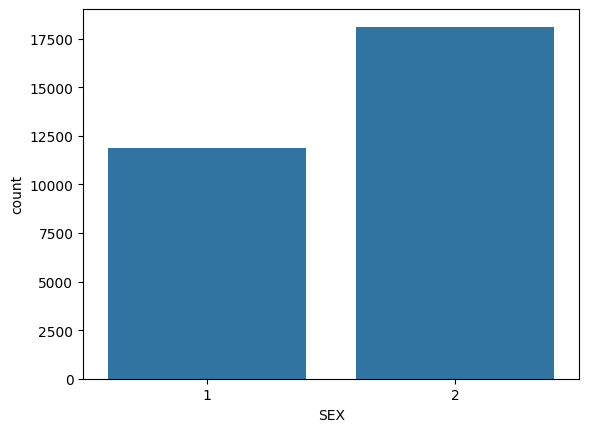

In [9]:
print(credit_risk_data['SEX'].value_counts())
sns.countplot(x='SEX',data=credit_risk_data)
plt.show()

## Cat Var3

Findings

EDUCATION
2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: count, dtype: int64


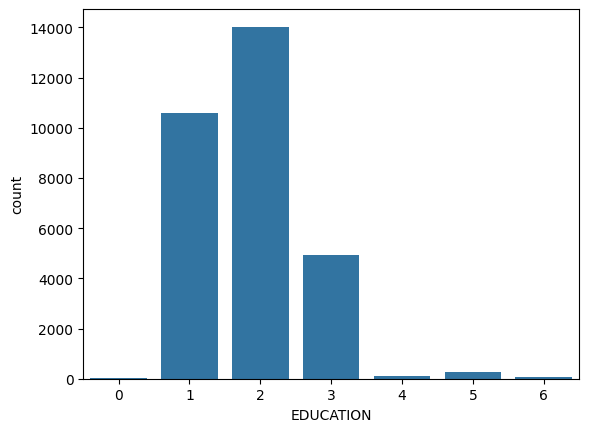

In [10]:
#Total 14 Outliers are there and also the presence of unknown or ambiguous categories (5, 6, 0) suggests potential data quality issues so it needs further investigation.
print(credit_risk_data['EDUCATION'].value_counts())
sns.countplot(x='EDUCATION',data=credit_risk_data)
plt.show()

## Cat Var4

Findings:

MARRIAGE
2    15964
1    13659
3      323
0       54
Name: count, dtype: int64


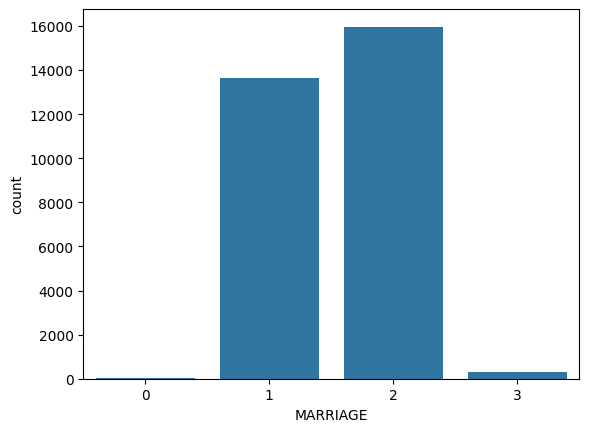

In [11]:
#0 having 54 counts are outlier here so need to be investigated and treated further.
print(credit_risk_data['MARRIAGE'].value_counts())
sns.countplot(x='MARRIAGE',data=credit_risk_data)
plt.show()

## Cat Var5

Findings:

AGE
29    1605
27    1477
28    1409
30    1395
26    1256
31    1217
25    1186
34    1162
32    1158
33    1146
24    1127
35    1113
36    1108
37    1041
39     954
38     944
23     931
40     870
41     824
42     794
44     700
43     670
45     617
46     570
22     560
47     501
48     466
49     452
50     411
51     340
53     325
52     304
54     247
55     209
56     178
58     122
57     122
59      83
60      67
21      67
61      56
62      44
63      31
64      31
66      25
65      24
67      16
69      15
70      10
68       5
73       4
72       3
75       3
71       3
79       1
74       1
Name: count, dtype: int64


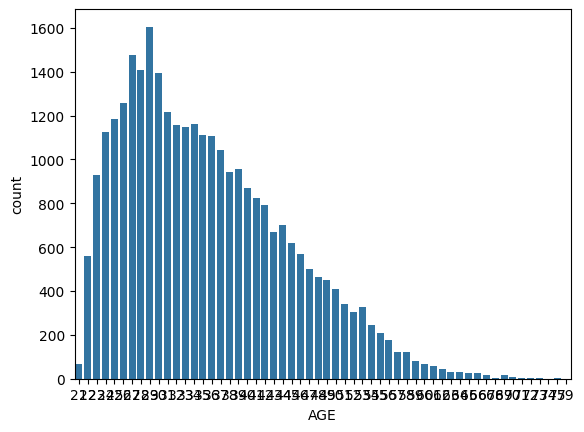

In [12]:
print(credit_risk_data['AGE'].value_counts())
sns.countplot(x='AGE',data=credit_risk_data)
plt.show()

## Cat Var6

Findings:

In [13]:
# PAY_0 need to be replaced by PAY_1 to maintain a continuity.
#0 and -2 are outliers here as those do not belong to the Data Dictionary
pay_0 = credit_risk_data['PAY_0'].value_counts()
pay_2 = credit_risk_data['PAY_2'].value_counts()
pay_3 = credit_risk_data['PAY_3'].value_counts()
pay_4 = credit_risk_data['PAY_4'].value_counts()
pay_5 = credit_risk_data['PAY_5'].value_counts()
pay_6 = credit_risk_data['PAY_6'].value_counts()
print(pay_0)
print(pay_2)
print(pay_3)
print(pay_4)
print(pay_5)
print(pay_6)

PAY_0
 0    14737
-1     5686
 1     3688
-2     2759
 2     2667
 3      322
 4       76
 5       26
 8       19
 6       11
 7        9
Name: count, dtype: int64
PAY_2
 0    15730
-1     6050
 2     3927
-2     3782
 3      326
 4       99
 1       28
 5       25
 7       20
 6       12
 8        1
Name: count, dtype: int64
PAY_3
 0    15764
-1     5938
-2     4085
 2     3819
 3      240
 4       76
 7       27
 6       23
 5       21
 1        4
 8        3
Name: count, dtype: int64
PAY_4
 0    16455
-1     5687
-2     4348
 2     3159
 3      180
 4       69
 7       58
 5       35
 6        5
 1        2
 8        2
Name: count, dtype: int64
PAY_5
 0    16947
-1     5539
-2     4546
 2     2626
 3      178
 4       84
 7       58
 5       17
 6        4
 8        1
Name: count, dtype: int64
PAY_6
 0    16286
-1     5740
-2     4895
 2     2766
 3      184
 4       49
 7       46
 6       19
 5       13
 8        2
Name: count, dtype: int64


## Cat Var7

Findings

default.payment.next.month
0    23364
1     6636
Name: count, dtype: int64


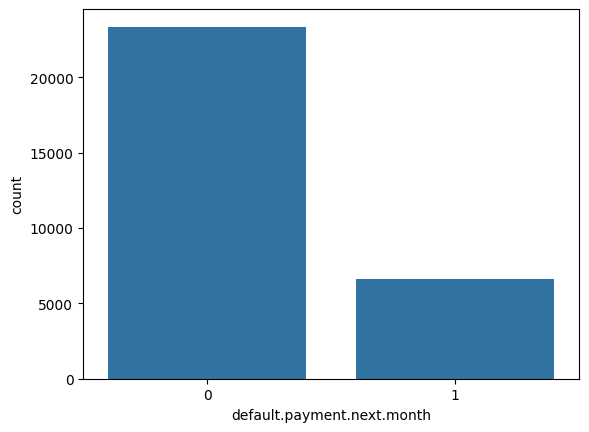

In [14]:
print(credit_risk_data['default.payment.next.month'].value_counts())
sns.countplot(x='default.payment.next.month',data=credit_risk_data)
plt.show()

## Continuous Variables Exploration

**`Continous Var 1`**[LIMIT BAL]

Findings

,LIMIT_BAL
0.050,20000.0
0.100,30000.0
0.250,50000.0
0.500,140000.0
0.750,240000.0
0.800,270000.0
0.900,360000.0
0.910,360000.0
0.950,430000.0
0.960,460000.0


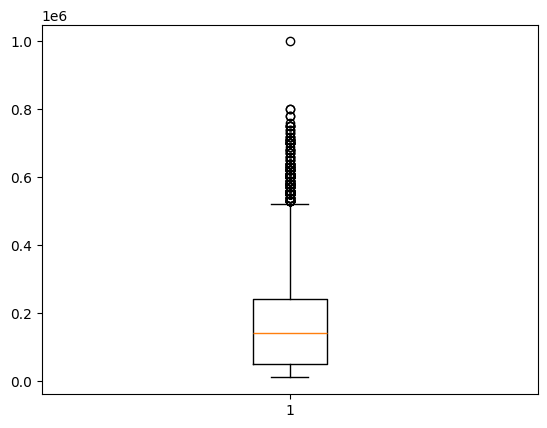

In [15]:
plt.boxplot(credit_risk_data["LIMIT_BAL"])
Bal_percentiles=credit_risk_data['LIMIT_BAL'].quantile([0.05, 0.1, 0.25, 0.5, 0.75, 0.80, 0.9,0.91,0.95,0.96,0.97,0.975,0.98,0.99,1])
round(Bal_percentiles,2)

## Continuous Var2 (Bill_Amt)

Findings

In [16]:
#Differences are very high from 0.99 to 1.00 which are needed to be investigated further.We can take 1% data and will try to clean it.

percentiles = [0,0.05, 0.1, 0.25, 0.5, 0.75, 0.80, 0.9, 0.91, 0.95, 0.96, 0.97, 0.975, 0.98, 0.99, 1]
bill_columns_1 = ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']
percentiles_df = credit_risk_data[bill_columns_1].apply(lambda x: x.quantile(percentiles), result_type='expand')
percentiles_df.index = percentiles
print(percentiles_df)

       BILL_AMT1  BILL_AMT2   BILL_AMT3  BILL_AMT4  BILL_AMT5   BILL_AMT6
0.000 -165580.00  -69777.00  -157264.00 -170000.00  -81334.00 -339603.000
0.050       0.00       0.00        0.00       0.00       0.00       0.000
0.100     278.90       0.00        0.00       0.00       0.00       0.000
0.250    3558.75    2984.75     2666.25    2326.75    1763.00    1256.000
0.500   22381.50   21200.00    20088.50   19052.00   18104.50   17071.000
0.750   67091.00   64006.25    60164.75   54506.00   50190.50   49198.250
0.800   83421.20   80292.20    76777.40   70579.00   65823.00   63150.600
0.900  142133.70  136905.50   132051.30  122418.70  115883.00  112110.400
0.910  151214.72  145064.86   139419.08  130937.09  123655.36  120740.530
0.950  201203.05  194792.20   187821.05  174333.35  165794.30  161912.000
0.960  220592.72  211343.08   203652.80  190088.52  181044.44  177592.760
0.970  245969.84  236662.72   228277.79  210965.51  198861.03  195114.300
0.975  262212.75  253464.95   243567.5

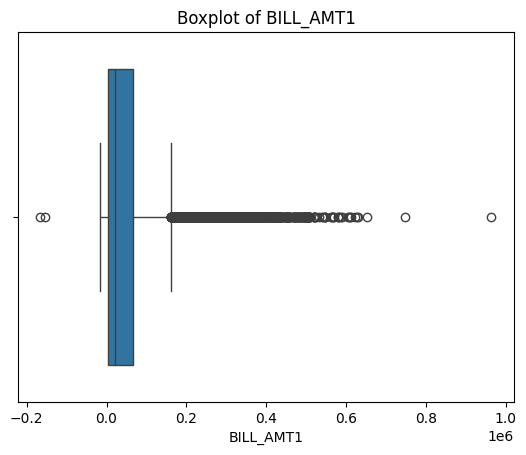

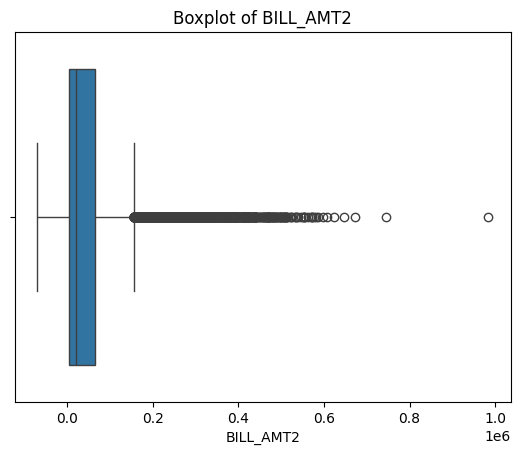

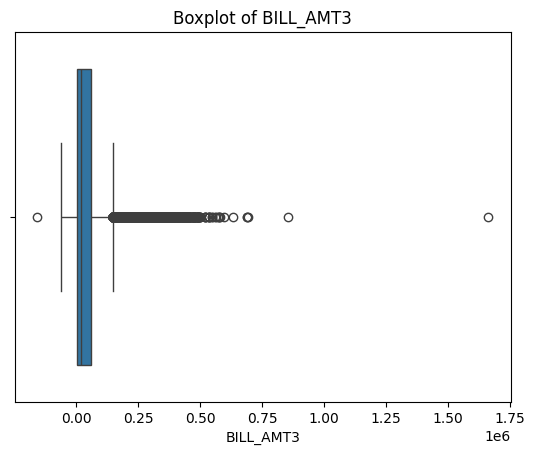

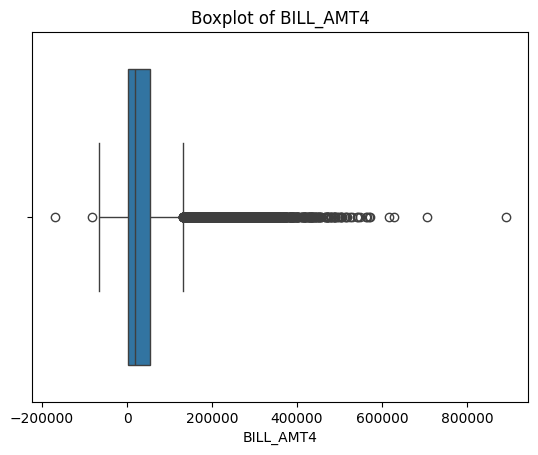

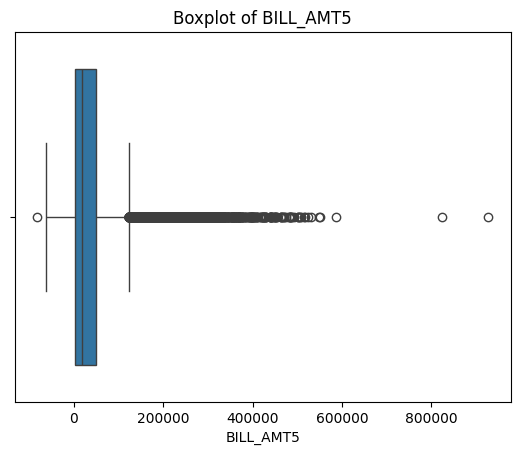

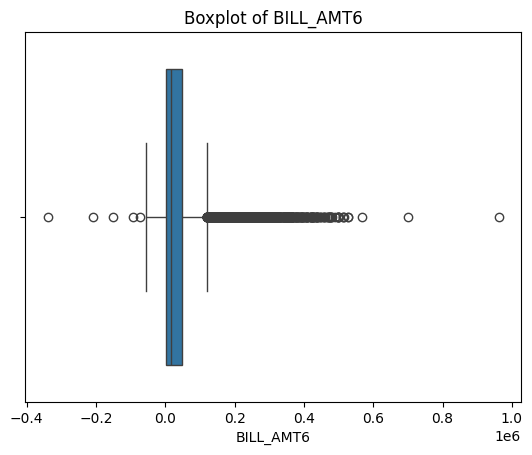

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

for col in bill_columns_1:
    sns.boxplot(x=credit_risk_data[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

## Continuous Var3..

Findings

In [19]:
percentiles = [0.05, 0.1, 0.25, 0.5, 0.75, 0.80, 0.9, 0.91, 0.95, 0.96, 0.97, 0.975, 0.98, 0.99, 1]
pay_columns = ['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
percentiles_dict = {col: credit_risk_data[col].quantile(percentiles) for col in pay_columns}
percentiles_df = pd.DataFrame(percentiles_dict)
print(percentiles_df)
#Differences are very high from 0.98 to 1.00 ,so it is possible that there are outliers in it which are needed to be investigated further.

        PAY_AMT1    PAY_AMT2   PAY_AMT3    PAY_AMT4   PAY_AMT5   PAY_AMT6
0.050       0.00        0.00       0.00       0.000       0.00       0.00
0.100       0.00        0.00       0.00       0.000       0.00       0.00
0.250    1000.00      833.00     390.00     296.000     252.50     117.75
0.500    2100.00     2009.00    1800.00    1500.000    1500.00    1500.00
0.750    5006.00     5000.00    4505.00    4013.250    4031.50    4000.00
0.800    6192.20     6000.00    5284.00    5000.000    5000.00    5000.00
0.900   10300.00    10401.10   10000.00    9570.600    9500.00    9600.00
0.910   11174.00    11320.00   10288.36   10000.000   10000.00   10000.00
0.950   18428.20    19004.35   17589.40   16014.950   16000.00   17343.80
0.960   21006.24    21408.36   20150.00   20000.000   20000.00   21034.88
0.970   28232.78    29000.00   27000.33   26665.400   25314.21   29561.76
0.975   32000.00    33000.00   30801.20   30218.125   30000.00   35110.10
0.980   40000.00    41027.88   38661.3

# Data Cleaning and Data Preparation

**## Var1 Cleaning (CAT Var 3)**

In [20]:
#Replacing 0 with the 4th category 'Others'
#And combine 4,5,6 into 'Others'
credit_risk_data['EDUCATION']=credit_risk_data['EDUCATION'].replace({0:4,5:4,6:4})
print(credit_risk_data['EDUCATION'].value_counts())

EDUCATION
2    14030
1    10585
3     4917
4      468
Name: count, dtype: int64


**## Var2 Cleaning (Marraige)**





In [21]:
#According to Data Dictionary , 0 category which is of 54 counts are the Outliers so they need to be investigated.
credit_risk_data['MARRIAGE']=credit_risk_data['MARRIAGE'].replace({0:3})
print(credit_risk_data['MARRIAGE'].value_counts())


MARRIAGE
2    15964
1    13659
3      377
Name: count, dtype: int64


**Var2 Cleaning (PAY)**

In [22]:
#Replacing PAY_0 to PAY_1 to maintain the continuity in the columns numbering.
credit_risk_data.rename(columns={'PAY_0':'PAY_1'},inplace=True)
credit_risk_data.columns.values


array(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1',
       'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
       'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5',
       'PAY_AMT6', 'default.payment.next.month'], dtype=object)

In [23]:
import pandas as pd
credit_risk_data = pd.DataFrame({
    'PAY_0': [14737, -1, 3688, -2, 2667, 322, 76, 26, 19, 11, 9],
    'PAY_2': [15730, 6050, 28, 3782, 3927, 326, 99, 25, 20, 12, 1],
    'PAY_3': [15764, 5938, 4, 4085, 3819, 240, 76, 21, 3, 23, 27],
    'PAY_4': [16455, 5687, 2, 4348, 3159, 180, 69, 35, 2, 5, 58],
    'PAY_5': [16947, 5539, 131, 4546, 2626, 178, 84, 17, 1, 4, 58],
    'PAY_6': [16286, 5740, 100, -2, 3000, 200, 90, 15, 10, 8, 5]})

credit_risk_data.replace({0: pd.NA, -2: pd.NA}, inplace=True)

for column in ['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']:
    median_value = credit_risk_data[column].median()
    credit_risk_data[column] = credit_risk_data[column].fillna(median_value)

print(credit_risk_data)




      PAY_0  PAY_2  PAY_3  PAY_4  PAY_5    PAY_6
0   14737.0  15730  15764  16455  16947  16286.0
1      -1.0   6050   5938   5687   5539   5740.0
2    3688.0     28      4      2    131    100.0
3      51.0   3782   4085   4348   4546     95.0
4    2667.0   3927   3819   3159   2626   3000.0
5     322.0    326    240    180    178    200.0
6      76.0     99     76     69     84     90.0
7      26.0     25     21     35     17     15.0
8      19.0     20      3      2      1     10.0
9      11.0     12     23      5      4      8.0
10      9.0      1     27     58     58      5.0


<ipython-input-23-b8d6fa42bb49>:14: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  credit_risk_data[column] = credit_risk_data[column].fillna(median_value)
<ipython-input-23-b8d6fa42bb49>:14: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  credit_risk_data[column] = credit_risk_data[column].fillna(median_value)


## Continuous Variables Cleaning

Continous Var 1[LIMIT BAL]

In [29]:
#Percentile Distribution for Limit Balance
Limit_Bal_percentiles=credit_risk_data['LIMIT_BAL'].quantile([0.05, 0.1, 0.25, 0.5, 0.75, 0.80, 0.9,0.91,0.95,0.96,0.97,0.975,0.98,0.99,1])
round(Limit_Bal_percentiles,2)

,LIMIT_BAL
0.050,20000.0
0.100,30000.0
0.250,50000.0
0.500,140000.0
0.750,240000.0
0.800,270000.0
0.900,360000.0
0.910,360000.0
0.950,430000.0
0.960,460000.0


In [76]:
#Finding the median values
median_value = credit_risk_data['LIMIT_BAL'].median()
median_value

140000.0

In [77]:
credit_risk_data['LIMIT_BAL_new'] = credit_risk_data['LIMIT_BAL']

In [78]:
# Treating the 4% of the variable with the median value .
credit_risk_data.loc[credit_risk_data['LIMIT_BAL'] >= 500000, 'LIMIT_BAL_new'] = median_value


In [79]:
#To varify
quantiles = credit_risk_data['LIMIT_BAL_new'].quantile([0.05, 0.1, 0.25, 0.5, 0.75, 0.80, 0.9, 0.91, 0.95, 0.96, 0.97, 0.975, 0.98, 0.99, 1])
print(quantiles)

0.050     20000.0
0.100     30000.0
0.250     50000.0
0.500    140000.0
0.750    220000.0
0.800    250000.0
0.900    330000.0
0.910    340000.0
0.950    370000.0
0.960    390000.0
0.970    400000.0
0.975    420000.0
0.980    430000.0
0.990    460000.0
1.000    490000.0
Name: LIMIT_BAL_new, dtype: float64


**Continous Var2 [BILL_AMT]

In [44]:
#Calculating the percentiles for the original data
percentiles = [0, 0.05, 0.1, 0.25, 0.5, 0.75, 0.80, 0.9, 0.91, 0.95, 0.96, 0.97, 0.975, 0.98, 0.99, 1]
bill_columns_1 = ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']

In [46]:
original_percentiles_df = credit_risk_data[bill_columns_1].apply(lambda x: x.quantile(percentiles), result_type='expand')
original_percentiles_df.index = percentiles

print(original_percentiles_df)

       BILL_AMT1  BILL_AMT2   BILL_AMT3  BILL_AMT4  BILL_AMT5   BILL_AMT6
0.000 -165580.00  -69777.00  -157264.00 -170000.00  -81334.00 -339603.000
0.050       0.00       0.00        0.00       0.00       0.00       0.000
0.100     278.90       0.00        0.00       0.00       0.00       0.000
0.250    3558.75    2984.75     2666.25    2326.75    1763.00    1256.000
0.500   22381.50   21200.00    20088.50   19052.00   18104.50   17071.000
0.750   67091.00   64006.25    60164.75   54506.00   50190.50   49198.250
0.800   83421.20   80292.20    76777.40   70579.00   65823.00   63150.600
0.900  142133.70  136905.50   132051.30  122418.70  115883.00  112110.400
0.910  151214.72  145064.86   139419.08  130937.09  123655.36  120740.530
0.950  201203.05  194792.20   187821.05  174333.35  165794.30  161912.000
0.960  220592.72  211343.08   203652.80  190088.52  181044.44  177592.760
0.970  245969.84  236662.72   228277.79  210965.51  198861.03  195114.300
0.975  262212.75  253464.95   243567.5

In [50]:
#Creating a new DataFrame for cleaned data
cleaned_credit_risk_data = credit_risk_data.copy()
#Imputing values above the 99th percentile with the median
median_values = credit_risk_data[bill_columns_1].median()
percentiles_99 = credit_risk_data[bill_columns_1].quantile(0.99)
for column in bill_columns_1:
    cleaned_credit_risk_data[column] = cleaned_credit_risk_data[column].apply(
        lambda x: median_values[column] if x > percentiles_99[column] else x
    )

In [52]:
#To varify:
cleaned_percentiles_df = cleaned_credit_risk_data[bill_columns_1].apply(lambda x: x.quantile(percentiles), result_type='expand')
cleaned_percentiles_df.index = percentiles
print(cleaned_percentiles_df)

        BILL_AMT1  BILL_AMT2   BILL_AMT3  BILL_AMT4   BILL_AMT5  BILL_AMT6
0.000 -165580.000  -69777.00 -157264.000 -170000.00  -81334.000 -339603.00
0.050       0.000       0.00       0.000       0.00       0.000       0.00
0.100     278.900       0.00       0.000       0.00       0.000       0.00
0.250    3558.750    2984.75    2666.250    2326.75    1763.000    1256.00
0.500   22381.250   21198.50   20088.250   19052.00   18104.250   17069.50
0.750   63673.250   60835.25   57606.500   51287.00   48738.000   47816.75
0.800   79868.000   77361.40   73069.800   67501.20   61746.400   59393.00
0.900  134628.900  130283.90  124691.500  115045.10  108074.900  105286.10
0.910  142133.530  136905.05  132051.270  122418.43  115882.900  112110.06
0.950  187073.800  180578.00  173240.450  160944.10  151270.150  148093.70
0.960  201202.840  194792.16  187820.840  174332.68  165794.240  161912.00
0.970  220591.540  211342.31  203652.350  190087.64  181043.580  177591.32
0.975  233438.075  223209

**Continous Var3 [PAY_AMT]

In [63]:
pay_columns = ['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
#Calculating the percentiles for the specified columns
percentiles = [0.05, 0.1, 0.25, 0.5, 0.75, 0.80, 0.9, 0.91, 0.95, 0.96, 0.97, 0.975, 0.98, 0.99, 1]


In [62]:
pay_original_percentiles = credit_risk_data[pay_columns].apply(lambda x: x.quantile(percentiles), result_type='expand')
pay_original_percentiles.index = percentiles

print(pay_original_percentiles)

        PAY_AMT1    PAY_AMT2   PAY_AMT3    PAY_AMT4   PAY_AMT5   PAY_AMT6
0.050       0.00        0.00       0.00       0.000       0.00       0.00
0.100       0.00        0.00       0.00       0.000       0.00       0.00
0.250    1000.00      833.00     390.00     296.000     252.50     117.75
0.500    2100.00     2009.00    1800.00    1500.000    1500.00    1500.00
0.750    5006.00     5000.00    4505.00    4013.250    4031.50    4000.00
0.800    6192.20     6000.00    5284.00    5000.000    5000.00    5000.00
0.900   10300.00    10401.10   10000.00    9570.600    9500.00    9600.00
0.910   11174.00    11320.00   10288.36   10000.000   10000.00   10000.00
0.950   18428.20    19004.35   17589.40   16014.950   16000.00   17343.80
0.960   21006.24    21408.36   20150.00   20000.000   20000.00   21034.88
0.970   28232.78    29000.00   27000.33   26665.400   25314.21   29561.76
0.975   32000.00    33000.00   30801.20   30218.125   30000.00   35110.10
0.980   40000.00    41027.88   38661.3

In [64]:
#Creating a new DataFrame
cleaned_pay_amt = credit_risk_data.copy()

In [65]:
#Imputing values above the 99th percentile with the median
pay_amt_median_values = credit_risk_data[pay_columns].median()
percentiles_990 = credit_risk_data[pay_columns].quantile(0.99)
for column in pay_columns:
    cleaned_pay_amt[column] = cleaned_pay_amt[column].apply(
        lambda x: pay_amt_median_values[column] if x > percentiles_990[column] else x
    )

In [66]:
#To Varify
cleaned_percentiles = cleaned_pay_amt[pay_columns].apply(lambda x: x.quantile(percentiles), result_type='expand')
cleaned_percentiles.index = percentiles
print(cleaned_percentiles)

        PAY_AMT1   PAY_AMT2   PAY_AMT3   PAY_AMT4  PAY_AMT5  PAY_AMT6
0.050      0.000      0.000      0.000      0.000      0.00      0.00
0.100      0.000      0.000      0.000      0.000      0.00      0.00
0.250   1000.000    833.000    390.000    296.000    252.50    117.75
0.500   2100.000   2009.000   1800.000   1500.000   1500.00   1500.00
0.750   5000.000   5000.000   4256.250   4000.000   4000.00   4000.00
0.800   6000.000   5872.400   5022.200   5000.000   5000.00   5000.00
0.900  10000.000  10000.000   9500.000   8599.100   8500.00   8585.10
0.910  10300.000  10400.990  10000.000   9570.540   9500.00   9600.00
0.950  15510.550  16000.000  15000.000  13949.500  13939.05  14442.55
0.960  18428.160  19004.080  17652.040  16014.760  16000.00  17343.44
0.970  21006.180  21408.270  20157.120  20000.000  20000.00  21034.16
0.975  24672.175  24962.075  22794.475  22601.475  21573.00  25000.00
0.980  28232.520  29000.000  27091.380  26664.600  25314.14  29560.84
0.990  40000.000  41

# Model Validation
Confusion matrix, Sensitivity, Specificity, F1 Score, Recall, Precision etc.

# Model  Deployment
## Optional step